# Evapotranspiration - exercises

- toc: true 
- badges: true
- comments: false
- categories: [jupyter]

We will calculate the evapotranspiration using two methods: Thornthwaite and Penman.

## Download data from the IMS

Go to the Israel Meteorological Service website, and download the following data:
1. [hourly data](https://ims.data.gov.il/he/ims/1)
 * on the first page, choose all options and press continue.
 * on the next page, choose the following date range: 01/01/2020 to 01/01/2021, then press continue.
 * Choose station Bet Dagan (בית דגן 2523), then select (בחר), then continue.
 * Choose option "by station" (לפי תחנות), then produce report.
 * Download report as csv, call it "bet-dagan-3h.csv".
2. [daily data](https://ims.data.gov.il/he/ims/2)
 * on the first page, choose all options and press continue.
 * on the next page, choose the following date range: 01/01/2020 to 01/01/2021, then press continue.
 * Choose station Bet Dagan Meuyeshet (בית דגן מאוישת 2520), then select (בחר), then continue.
 * Choose option "by station" (לפי תחנות), then produce report.
 * Download report as csv, call it "bet-dagan-day-pan.csv".
3. [radiation data](https://ims.data.gov.il/he/ims/6)
 * on the first page, choose all options, **then on the bottom right option "radiation" (קרינה), choose kJ/m2**, and then press continue.
 * on the next page, choose the following date range: 01/01/2020 to 01/01/2021, then press continue.
 * Choose station Bet Dagan Krina (בית דגן קרינה 2524), then select (בחר), then continue.
 * Choose option "by station" (לפי תחנות), then produce report.
 * Download report as csv, call it "bet-dagan-radiation.csv".
 
## Import relevant packages 

In [1]:
#collapse-hide

import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()  # datetime converter for a matplotlib
import seaborn as sns
sns.set(style="ticks", font_scale=1.5)

## import hourly data

In [2]:
#collapse-hide

df = pd.read_csv('bet-dagan-3h.csv', encoding = 'unicode_escape', na_values=["-"])
# find out what hebrew gibberish means: http://www.pixiesoft.com/flip/
name_conversion_dictionary = {"ùí úçðä": "station name",
                              "îñôø úçðä": "station number",
                              "úàøéê": "Date",
                              "ùòä-LST": "LST time",
                              "èîôøèåøä(C°)": "T",
                              "èîôøèåøä ìçä(C°)": "wet-bulb temperature (°C)",
                              "èîôøèåøú ð÷åãú äèì(C°)": "dew_point_T",
                              "ìçåú éçñéú(%)": "relative humidity (%)",
                              "îäéøåú äøåç(m/s)": "wind_speed",
                              "ëéååï äøåç(îòìåú)": "wind direction (degrees)",
                              "ìçõ áâåáä äúçðä(hPa)": "Pressure",
                              "ìçõ áâåáä ôðé äéí(hPa)": "pressure at sea level (hPa)",
                              """äúàãåú éåîéú îâéâéú ñåâ à'(î"î)""": "pan evaporation (mm)",
                              "ñåâ ÷øéðä()": "radiation type",
                             }
# units
# T = temperature (°C)
# dew_point_T = dew point temperature (°C)
# wind_speed = wind speed (m/s)
# Pressure = pressure at station height (hPa = 0.1 kPa)

df = df.rename(columns=name_conversion_dictionary)
df['timestamp'] = df['Date'] + ' ' + df['LST time']
df['timestamp'] = pd.to_datetime(df['timestamp'], dayfirst=True)
df = df.set_index('timestamp')
df

station name  \
timestamp                                                                
2020-01-01 02:00:00  áéú ãâï                                       ...   
2020-01-01 05:00:00  áéú ãâï                                       ...   
2020-01-01 08:00:00  áéú ãâï                                       ...   
2020-01-01 11:00:00  áéú ãâï                                       ...   
2020-01-01 14:00:00  áéú ãâï                                       ...   
...                                                                ...   
2021-01-31 11:00:00  áéú ãâï                                       ...   
2021-01-31 14:00:00  áéú ãâï                                       ...   
2021-01-31 17:00:00  áéú ãâï                                       ...   
2021-01-31 20:00:00  áéú ãâï                                       ...   
2021-01-31 23:00:00  áéú ãâï                                       ...   

                     station number        Date LST time     T  \
timestamp                                                        
2020-01-01 02:00:00            2523  01-01-2020    02:00   7.9   
2020-01-01 05:00:00            2523  01-01-2020    05:00   7.5   
2020-01-01 08:00:00            2523  01-01-2020    08:00   8.6   
2020-01-01 11:00:00            2523  01-01-2020    11:00  15.9   
2020-01-01 14:00:00            2523  01-01-2020    14:00  18.1   
...                             ...         ...      ...   ...   
2021-01-31 11:00:00            2523  31-01-2021    11:00  19.0   
2021-01-31 14:00:00            2523  31-01-2021    14:00  19.2   
2021-01-31 17:00:00            2523  31-01-2021    17:00  18.2   
2021-01-31 20:00:00            2523  31-01-2021    20:00  13.1   
2021-01-31 23:00:00            2523  31-01-2021    23:00  10.8   

                     wet-bulb temperature (°C)  dew_point_T  \
timestamp                                                     
2020-01-01 02:00:00                        7.2          6.4   
2020-01-01 05:00:00                        7.0          6.4   
2020-01-01 08:00:00                        8.3          8.0   
2020-01-01 11:00:00                       13.1         10.6   
2020-01-01 14:00:00                       14.0         10.4   
...                                        ...          ...   
2021-01-31 11:00:00                       13.7          8.9   
2021-01-31 14:00:00                       14.7         11.0   
2021-01-31 17:00:00                       14.8         12.2   
2021-01-31 20:00:00                       12.3         11.7   
2021-01-31 23:00:00                       10.6         10.3   

                     relative humidity (%)  wind_speed  \
timestamp                                                
2020-01-01 02:00:00                     90         1.7   
2020-01-01 05:00:00                     93         1.2   
2020-01-01 08:00:00                     96         1.1   
2020-01-01 11:00:00                     71         2.4   
2020-01-01 14:00:00                     61         2.8   
...                                    ...         ...   
2021-01-31 11:00:00                     52         5.6   
2021-01-31 14:00:00                     59         4.6   
2021-01-31 17:00:00                     68         0.8   
2021-01-31 20:00:00                     91         1.2   
2021-01-31 23:00:00                     97         1.7   

                     wind direction (degrees)  ...  \
timestamp                                      ...   
2020-01-01 02:00:00                     117.0  ...   
2020-01-01 05:00:00                     116.0  ...   
2020-01-01 08:00:00                     107.0  ...   
2020-01-01 11:00:00                     196.0  ...   
2020-01-01 14:00:00                     264.0  ...   
...                                       ...  ...   
2021-01-31 11:00:00                     235.0  ...   
2021-01-31 14:00:00                     252.0  ...   
2021-01-31 17:00:00                     203.0  ...   
2021-01-31 20:00:00                      79.0  ...   
2021-01-31 23

## import daily data with pan evaporation

In [3]:
#collapse-hide

df2 = pd.read_csv('bet-dagan-day-pan.csv', encoding = 'unicode_escape', na_values=["-"])
df2 = df2.rename(columns=name_conversion_dictionary)
df2['Date'] = pd.to_datetime(df2['Date'], dayfirst=True)
df2 = df2.set_index('Date')
df2

station name  station number  \
Date                                                                            
2020-01-01  áéú ãâï îàåéùú                                ...            2520   
2020-01-02  áéú ãâï îàåéùú                                ...            2520   
2020-01-03  áéú ãâï îàåéùú                                ...            2520   
2020-01-04  áéú ãâï îàåéùú                                ...            2520   
2020-01-05  áéú ãâï îàåéùú                                ...            2520   
...                                                       ...             ...   
2021-01-27  áéú ãâï îàåéùú                                ...            2520   
2021-01-28  áéú ãâï îàåéùú                                ...            2520   
2021-01-29  áéú ãâï îàåéùú                                ...            2520   
2021-01-30  áéú ãâï îàåéùú                                ...            2520   
2021-01-31  áéú ãâï îàåéùú                                ...            2520   

            èîôøèåøú î÷ñéîåí(C°)  èîôøèåøú îéðéîåí(C°)  \
Date                                                     
2020-01-01                   NaN                   NaN   
2020-01-02                   NaN                   NaN   
2020-01-03                   NaN                   NaN   
2020-01-04                   NaN                   NaN   
2020-01-05                   NaN                   NaN   
...                          ...                   ...   
2021-01-27                   NaN                   NaN   
2021-01-28                   NaN                   NaN   
2021-01-29                   NaN                   NaN   
2021-01-30                   NaN                   NaN   
2021-01-31                   NaN                   NaN   

            èîôøèåøú îéðéîåí ìéã ä÷ø÷ò(C°)  îùê æäéøú ùîù(ã÷åú)  \
Date                                                              
2020-01-01                             NaN                  NaN   
2020-01-02                             NaN                  NaN   
2020-01-03                             NaN                  NaN   
2020-01-04                             NaN                  NaN   
2020-01-05                             NaN                  NaN   
...                                    ...                  ...   
2021-01-27                             NaN                  NaN   
2021-01-28                             NaN                  NaN   
2021-01-29                             NaN                  NaN   
2021-01-30                             NaN                  NaN   
2021-01-31                             NaN                  NaN   

            pan evaporation (mm)  ÷åã äúàãåú éåîéú()  
Date                                                  
2020-01-01                   0.8                 0.0  
2020-01-02                   NaN                 NaN  
2020-01-03                   NaN                 NaN  
2020-01-04                   NaN                 NaN  
2020-01-05                   2.4                 0.0  
...                          ...                 ...  
2021-01-27                   2.5                 0.0  
2021-01-28                   1.2                 0.0  
2021-01-29                   NaN                 NaN  
2021-01-30                   NaN                 NaN  
2021-01-31                   2.6                 0.0  

[397 rows x 8 columns]

## import daily data with radiation

In [4]:
#collapse-hide

df3 = pd.read_csv('bet-dagan-radiation.csv', encoding = 'unicode_escape', na_values=["-"])
df3 = df3.rename(columns=name_conversion_dictionary)
df3['Date'] = pd.to_datetime(df3['Date'], dayfirst=True)
df3 = df3.set_index('Date')
df3 = df3.replace({"éùéøä": "direct",
                   "îôåæøú": "diffuse",
                   "âìåáàìéú": "global"})
df3['daily_radiation_MJ_per_m2_per_day'] = df3.iloc[:, 3:].sum(axis=1)/1000
df_radiation = df3.loc[df3["radiation type"] == "global", "daily_radiation_MJ_per_m2_per_day"].to_frame()
df_radiation

daily_radiation_MJ_per_m2_per_day
Date                                         
2020-01-01                            10.0296
2020-01-02                             4.3128
2020-01-03                            11.6748
2020-01-04                             1.6452
2020-01-05                             6.8544
...                                       ...
2021-01-27                            12.2652
2021-01-28                             7.1640
2021-01-29                             7.2936
2021-01-30                             9.3276
2021-01-31                            13.5468

[396 rows x 1 columns]

## Part 1: Thornthwaite estimation

$$
E = 16\left[ \frac{10\,T^\text{monthly mean}}{I} \right]^a,
$$

where

$$
I = \sum_{i=1}^{12} \left[ \frac{T_i^\text{monthly mean}}{5} \right]^{1.514},
$$

and

$$
\begin{align}
a &= 6.75\times 10^{-7}I^3 \\
   &- 7.71\times 10^{-5}I^2 \nonumber\\
   &+ 1.792\times 10^{-2}I \nonumber\\
   &+ 0.49239 \nonumber
\end{align}
$$

 - $E$ is the monthly potential ET (mm)
 - $T_\text{monthly mean}$ is the mean monthly temperature in °C
 - $I$ is a heat index
 - $a$ is a location-dependent coefficient

From df, make a new dataframe, df_th, that stores monthly temperatures means. Use `resample` function.

In [5]:
#collapse-hide

# monthly data
df_th = (df['T'].resample('MS')  # MS assigns mean to first day in the month
                .mean()
                .to_frame()
        )
# we now add 14 days to the index, so that all monthly data is in the middle of the month
# not really necessary, makes plot look better
df_th.index = df_th.index + pd.DateOffset(days=14)
df_th

T
timestamp            
2020-01-15  12.484274
2020-02-15  14.046983
2020-03-15  16.439113
2020-04-15  18.512500
2020-05-15  23.166532
2020-06-15  24.600000
2020-07-15  27.353226
2020-08-15  28.090323
2020-09-15  28.462500
2020-10-15  25.120161
2020-11-15  19.308475
2020-12-15  15.916129
2021-01-15  14.123790

Calculate $I$, then $a$, and finally $E_p$. Add $E_p$ as a new column in df_th.

In [6]:
#collapse-hide

# Preparing "I" for the Thornthwaite equation
I = np.sum( (df_th['T']/5)**(1.514) )

# Preparing "a" for the Thornthwaite equation
a = (+6.75e-7 * I**3 
     -7.71e-5 * I**2
     +1.792e-2 * I
     + 0.49239)

# The final Thornthwaite model for monthly potential ET (mm)
df_th['Ep'] = 16*((10*df_th['T']/I)**a)
df_th

T          Ep
timestamp                        
2020-01-15  12.484274   20.163427
2020-02-15  14.046983   27.179636
2020-03-15  16.439113   40.472053
2020-04-15  18.512500   54.671821
2020-05-15  23.166532   96.461219
2020-06-15  24.600000  112.296873
2020-07-15  27.353226  146.898516
2020-08-15  28.090323  157.128632
2020-09-15  28.462500  162.453109
2020-10-15  25.120161  118.406386
2020-11-15  19.308475   60.820862
2020-12-15  15.916129   37.291178
2021-01-15  14.123790   27.557481

Plot the Thornthwaite ET that you calculated.

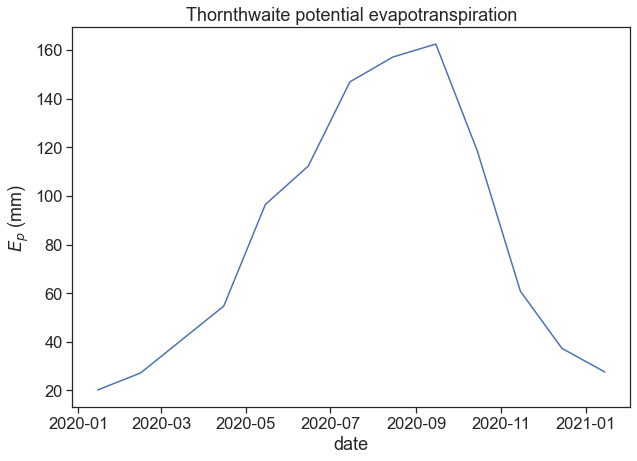

In [7]:
#collapse-hide

fig, ax = plt.subplots(1, figsize=(10,7))
ax.plot(df_th['Ep'])
ax.set(xlabel="date",
       ylabel=r"$E_p$ (mm)",
       title="Thornthwaite potential evapotranspiration");

## Part 2: Penman

The Penman model is almost entirely a theory based formula for predicting evaporative flux. It can run on a much finer timescale, and requires a much wider variety of data than most models. In addition to temperature, the Penman functions on measurements of radiation, wind speed, elevation above sea level, vapour-pressure deficit, and heat flux density to the ground.

$$
E = \frac{1}{\lambda}\left[ \frac{\Delta}{\Delta+\gamma}Q_{ne}+ \frac{\gamma}{\Delta+\gamma}E_A \right],
$$

where $Q_n$ is the available energy flux density

$$
Q_n = R_n - G,
$$

and $E_A$ is the drying power of the air

$$
E_A = 6.43\cdot f(u)\cdot\text{VPD}.
$$


$$
\gamma = \frac{c_p\, P}{\lambda\cdot MW_\text{ratio}}
$$
  
$$
P = 101.3-0.01055 H
$$

$$
\lambda = 2.501 - 2.361\times 10^{-3}\,T
$$

* $MW_\text{ratio}=0.622$: ratio molecular weight of water vapor/dry air
* $P$: atmospheric pressure (kPa). Can be either measured or inferred from station height above sea level (m).
* $\lambda$: latent heat of water vaporization (MJ kg$^{-1}$)








$$
R_n = (1-\alpha)R_s\!\! \downarrow -R_b \!\! \uparrow,
$$

where $\alpha$ (dimensionless) is the albedo.
The net outgoing thermal radiation $R_b$ is given by

$$
R_b = \left( a\frac{R_s}{R_{so}+b} \right)R_{bo},
$$

where $R_{so}$ is the solar radiation on a cloudless day, and it depends on latitude and day of the year.
$R_{bo}$ is given by

$$
R_{bo} = \epsilon\, \sigma\, T^4_{Kelvin},
$$

where $\sigma=4.903\times 10^{-9}$ MJ m$^{-2}$ d$^{-1}$ K$^{-4}$, and $\epsilon$ is net net emissivity:

$$
\epsilon=-0.02+0.261 \exp\left(-7.77\times10^{-4}T_{Celcius}^2\right).
$$

The parameters $a$ and $b$ are determined for the climate of the area:
* $a=1.0$, $b=0.0$ for humid areas,
* $a=1.2$, $b=-0.2$ for arid areas,
* $a=1.1$, $b=-0.1$ for semihumid areas.

$$
G = 4.2\frac{T_{i+1}-T_{i-1}}{\Delta t}
$$

$$
\text{VPD} = e_s - e_d.
$$

For temperatures ranging from 0 to 50 °C, the saturation vapor pressure can be calculated with

$$
e_s = \exp \left[ \frac{16.78\, T -116.9}{T+237.3} \right],
$$

and the actual vapor pressure is given by

$$
e_d = e_s \frac{RH}{100},
$$











$$
\Delta = \frac{\text{d} e_s}{\text{d}T} = e_s(T)\cdot \frac{4098.79}{(T+237.3)^2}.
$$









$$
f(u) = 0.26(1.0 + 0.54\, u_2)
$$








The various components of the equations above are:

  $$
    \Delta = 0.200 \cdot (0.00738\,T + 0.8072)^7 - 0.000116
  $$

  $$
    \gamma = \frac{c_p\, P}{0.622 \lambda}
  $$
  
  $$
    P = 101.3-0.01055 H
  $$

  $$
    \lambda = 2.501 - 2.361\times 10^{-3}\,T
  $$

  $$
    f_e(u) = 1.0 + 0.53\, u_2
  $$
  
  $$
    G = 4.2\frac{T_{i+1}-T_{i-1}}{\Delta t}
  $$
  
  $$
    e_s = \exp \left[ \frac{16.78\, T -116.9}{T+237.3} \right]
  $$
  
  $$
    e_d = e_s \frac{RH}{100}
  $$
where $\Delta t$ is the time *in days* between midpoints of time periods $i+1$ and $i−1$, and $T$ is the air temperature (°C).


 - $\Delta$: slope of the saturation water vapor pressure curve (kPa °C$^{-1}$)
 - $\gamma$: psychrometric constant (kPA °C$^{-1}$)
 - $c_p=0.001013$: specific heat of water at constant pressure (MJ kg$^{-1}$ °C$^{-1}$)
 - $P$: atmospheric pressure (kPa)
 - $H$: elevation above sea level (m)
 - $\lambda$: latent heat of vaporization (MJ kg$^{-1}$)
 - $R_n$: net radiation (MJ m$^{-2} d^{-1}$)
 - $G$: heat flux density to the ground (MJ m$^{-2} d^{-1}$)
 - $u_{2}$: wind speed measured 2 m above ground (m s$^{-1}$)
 - $e_{s} - e_{d}$: vapor pressure deficit (kPa) 
 - $e_{s}$: saturation vapor pressure (kPa) 
 - $e_{d}$: actual vapor pressure (kPa) 

Calculate daily means for the following columns: temperature `T`, wind speed `wind_speed`, atmospheric pressure `Pressure`, and relative humidity `relative humidity (%)`. Remember that pressure data was given in hectopascal, 1 hPa = 0.1 kPa. Store all the calculated values in a new dataframe, called `df_pen`.

In [8]:
#collapse-hide

# Resampling hourly data over same day and taking mean, to obtain daily averages
df_pen = (df['T'].resample('D')
                 .mean()
                 .to_frame()
         )
df_pen['dew_point'] = (df['dew_point_T'].resample('D')
                                        .mean()
                      )
df_pen['u'] = (df['wind_speed'].resample('D')
                               .mean()
              )
df_pen['P'] = (df['Pressure'].resample('D')
                             .mean()
              )/10
df_pen['RH'] = (df['relative humidity (%)'].resample('D')
                                           .mean()
               )
df_pen

T  dew_point       u          P      RH
timestamp                                                
2020-01-01  12.3625     9.0625  1.5250  101.30875  81.500
2020-01-02  11.9750     9.8250  1.9250  101.20125  87.000
2020-01-03  13.0500     4.9750  5.1750  101.37125  58.500
2020-01-04  10.8625     6.6875  5.5625  101.15500  78.375
2020-01-05  12.9375     9.2125  4.5625  101.23625  79.125
...             ...        ...     ...        ...     ...
2021-01-27  13.8125     8.2375  1.8875  100.83750  72.375
2021-01-28  14.4000    10.2250  3.5250  101.12750  76.750
2021-01-29  12.3500     7.9125  5.0250  101.22125  75.250
2021-01-30  12.9625     7.6500  4.4250  101.49500  71.375
2021-01-31  15.0625     8.3125  3.7500  101.32500  66.000

[397 rows x 5 columns]

With average $T$ for every day of the year, we can now calculate daily latent heat of vaporization $\lambda$, the slope of the saturation-vapor pressure-temperature curve $\Delta$, and the heat flux density to the ground $G$. Add each of these to dataframe `df_pen`.  

Calculate also the wind function using the data for wind speed, and add this to `df_pen`.

In [9]:
#collapse-hide

def lambda_latent_heat(T):
    """daily latent heat of vaporization (MJ/kg)"""
    return 2.501 - 2.361e-3*T

def Delta(T):
    """slope of saturation-vapor curve (kPa/°C)"""
    return 0.2000*(0.00738*T + 0.8072)**7 - 0.000116

def G(T):
    """heat flux density to the ground, G (MJ/m2/d)"""
    return 4.2*np.gradient(T.values)

cp = 0.001013  # (MJ kg−1 °C−1) 
df_pen['lambda'] = lambda_latent_heat(df_pen['T'])
df_pen['Delta'] = Delta(df_pen['T'])
df_pen['G'] = G(df_pen['T'])
df_pen['gamma'] = (cp*df_pen['P'])/(0.622*df_pen['lambda'])
df_pen['f_wind'] = 1.0 + 0.53 * df_pen['u']
df_pen

T  dew_point       u          P      RH    lambda     Delta  \
timestamp                                                                       
2020-01-01  12.3625     9.0625  1.5250  101.30875  81.500  2.471812  0.094385   
2020-01-02  11.9750     9.8250  1.9250  101.20125  87.000  2.472727  0.092300   
2020-01-03  13.0500     4.9750  5.1750  101.37125  58.500  2.470189  0.098185   
2020-01-04  10.8625     6.6875  5.5625  101.15500  78.375  2.475354  0.086530   
2020-01-05  12.9375     9.2125  4.5625  101.23625  79.125  2.470455  0.097554   
...             ...        ...     ...        ...     ...       ...       ...   
2021-01-27  13.8125     8.2375  1.8875  100.83750  72.375  2.468389  0.102551   
2021-01-28  14.4000    10.2250  3.5250  101.12750  76.750  2.467002  0.106028   
2021-01-29  12.3500     7.9125  5.0250  101.22125  75.250  2.471842  0.094317   
2021-01-30  12.9625     7.6500  4.4250  101.49500  71.375  2.470396  0.097694   
2021-01-31  15.0625     8.3125  3.7500  101.32500  66.000  2.465437  0.110070   

                  G     gamma    f_wind  
timestamp                                
2020-01-01 -1.62750  0.066750  1.808250  
2020-01-02  1.44375  0.066654  2.020250  
2020-01-03 -2.33625  0.066835  3.742750  
2020-01-04 -0.23625  0.066553  3.948125  
2020-01-05  4.25250  0.066739  3.418125  
...             ...       ...       ...  
2021-01-27  4.77750  0.066532  2.000375  
2021-01-28 -3.07125  0.066760  2.868250  
2021-01-29 -3.01875  0.066691  3.663250  
2021-01-30  5.69625  0.066911  3.345250  
2021-01-31  8.82000  0.066933  2.987500  

[397 rows x 10 columns]

It's time to calculate net radiation $R_n$. The monthly mean solar radiation $R_{so}$ for latitude 30 degrees is  
`[17.46, 21.65, 25.96, 29.85, 32.11, 33.20, 32.66, 30.44, 26.67, 22.48, 18.30, 16.04]` (MJ m$^{-2}$ d$^{-1}$)  
(Israel's latitude is ~ 31 degrees).

* Add a new column `Rso_monthly` to `df_pen`, where each day has the appropriate $R_{so}$ given by the data above. 
* Add a new columns `Rs` with the global radiation data imported in the 3rd file.

Text(0, 0.5, '$R_{so}$ (MJ m$^{-2} d^{-1}$)')

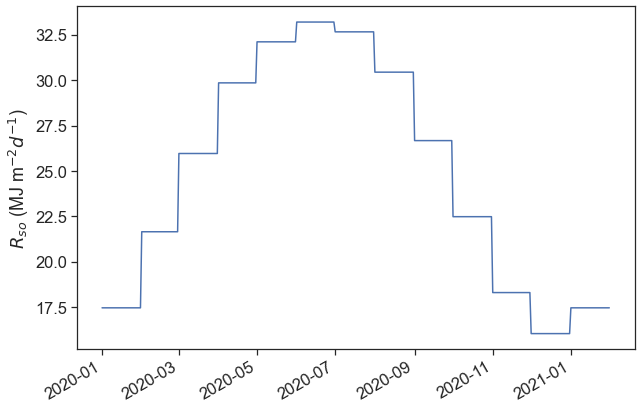

In [10]:
#collapse-hide

# Rso: mean solar radiation from a cloudless sky (based on latitude)
# MJ/m2/d
Rso_monthly = np.array([17.46, 21.65, 25.96, 29.85,
                        32.11, 33.20, 32.66, 30.44,
                        26.67, 22.48, 18.30, 16.04])
  
# create empty columns
df_pen["Rso_monthly"] = ""

# every day in the month will have the same values for Rso
for i in range(12):
    df_pen.loc[df_pen.index.month==(i+1), "Rso_monthly"] = Rso_monthly[i]

df_pen["Rs"] = df_radiation["daily_radiation_MJ_per_m2_per_day"]

fig, ax = plt.subplots(1, figsize=(10,7))
ax.plot(df_pen['Rso_monthly'])
plt.gcf().autofmt_xdate()
ax.set_ylabel(r"$R_{so}$ (MJ m$^{-2} d^{-1}$)")

Text(0, 0.5, '$R_{so}$ (MJ m$^{-2} d^{-1}$)')

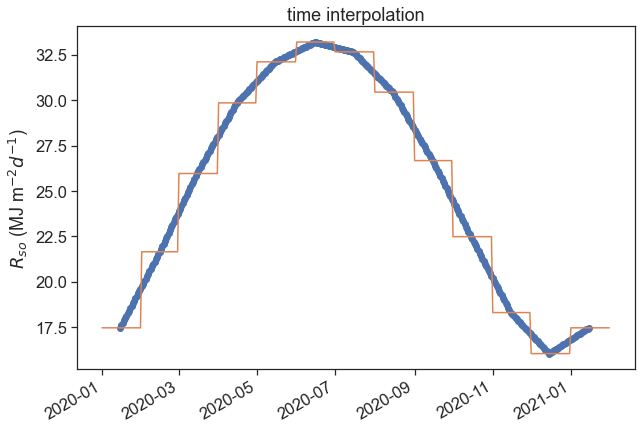

In [11]:
#collapse-hide

middle = pd.date_range(start='1/1/2020', periods=13, freq='MS') + pd.DateOffset(days=14)
new = df_pen.loc[middle, 'Rso_monthly'].astype('float')
new
df_i = (pd.DataFrame(data=new, index=new.index) #create the dataframe
           .resample("D") #resample daily
           .interpolate(method='time') #interpolate by time
       )

fig, ax = plt.subplots(1, figsize=(10,7))
ax.plot(df_i, 'o')
ax.plot(df_pen['Rso_monthly'])
plt.gcf().autofmt_xdate()
ax.set_title("time interpolation")
ax.set_ylabel(r"$R_{so}$ (MJ m$^{-2} d^{-1}$)")

from: Ward & Trimble, "Environmental Hydrology", 2nd Edition, page 99.

* Calculate 
  $$
  R_{bo} = \epsilon\, \sigma\, T^4_{Kelvin},
  $$
  where
  $$
  \epsilon=-0.02+0.261 \exp\left(-7.77\times10^{-4}T_{Celcius}^2\right),
  $$  
  $$
  \sigma=4.903\times 10^{-9} \text{  MJ m$^{-2}$ d$^{-1}$ K$^{-4}$},
  $$
  and
  $$
  T_{Kelvin}=T_{Celcius}+273.15
  $$
* Calculate 
  $$
  R_b = \left( a\frac{R_s}{R_{so}+b} \right)R_{bo},
  $$
  where  
  - for humid areas, $a=1.0$ and $b=0$,  
  - for arid areas, $a=1.2$ and $b=-0.2$,  
  - for semihumid areas, $a=1.1$ and $b=-0.1$
* Finally, calculate 
  $$
  R_n = (1-\alpha)R_s\!\! \downarrow -R_b \!\! \uparrow,
  $$
  where  
  - $\alpha= 0.23$ for most green crops with a full cover
  - $\alpha= 0.04$ for fresh asphalt
  - $\alpha= 0.12$ for worn-out asphalt
  - $\alpha= 0.55$ for fresh concrete

Add a new column `Rn` to `df_pen` dataframe.

In [12]:
#collapse-hide

# Stefan-Boltzmann constant
sigma = 4.903e-9
emissivity = -0.02 + 0.261 * np.exp(-7.77e-4 * df_pen['T']**2)

# Rbo: net longwave radiation for clear skies, otherwise known as diffuse radiation or emitted radiation from the
# atmosphere - 'how hot is it?'
Rbo = emissivity*sigma*((df_pen['T']+273.15)**4)

# net outgoing long-wave radiation (note: Rs/Rso = proportion of how clear the day is)
# for humid areas, a=1.0 and b=0
# for arid areas, a=1.2 and b=-0.2
# for semihumid areas, a=1.1 and b=-0.1
a = 1.2
b = -0.2
Rb = (a*df_pen['Rs']/df_pen['Rso_monthly'] + b)*Rbo   

# α is the albedo, or short-wave reflectance (dimensionless)
alpha = 0.23

# net radiation
Rn = (1 - alpha) * df_pen['Rs'] - Rb   # (MJ/m2/d)
df_pen['Rn'] = Rn
df_pen

T  dew_point       u          P      RH    lambda     Delta  \
timestamp                                                                       
2020-01-01  12.3625     9.0625  1.5250  101.30875  81.500  2.471812  0.094385   
2020-01-02  11.9750     9.8250  1.9250  101.20125  87.000  2.472727  0.092300   
2020-01-03  13.0500     4.9750  5.1750  101.37125  58.500  2.470189  0.098185   
2020-01-04  10.8625     6.6875  5.5625  101.15500  78.375  2.475354  0.086530   
2020-01-05  12.9375     9.2125  4.5625  101.23625  79.125  2.470455  0.097554   
...             ...        ...     ...        ...     ...       ...       ...   
2021-01-27  13.8125     8.2375  1.8875  100.83750  72.375  2.468389  0.102551   
2021-01-28  14.4000    10.2250  3.5250  101.12750  76.750  2.467002  0.106028   
2021-01-29  12.3500     7.9125  5.0250  101.22125  75.250  2.471842  0.094317   
2021-01-30  12.9625     7.6500  4.4250  101.49500  71.375  2.470396  0.097694   
2021-01-31  15.0625     8.3125  3.7500  101.32500  66.000  2.465437  0.110070   

                  G     gamma    f_wind Rso_monthly       Rs        Rn  
timestamp                                                               
2020-01-01 -1.62750  0.066750  1.808250       17.46  10.0296  4.346568  
2020-01-02  1.44375  0.066654  2.020250       17.46   4.3128  2.653905  
2020-01-03 -2.33625  0.066835  3.742750       17.46  11.6748  4.854942  
2020-01-04 -0.23625  0.066553  3.948125       17.46   1.6452  1.871722  
2020-01-05  4.25250  0.066739  3.418125       17.46   6.8544  3.415474  
...             ...       ...       ...         ...      ...       ...  
2021-01-27  4.77750  0.066532  2.000375       17.46  12.2652  5.060995  
2021-01-28 -3.07125  0.066760  2.868250       17.46   7.1640  3.534995  
2021-01-29 -3.01875  0.066691  3.663250       17.46   7.2936  3.537119  
2021-01-30  5.69625  0.066911  3.345250       17.46   9.3276  4.152687  
2021-01-31  8.82000  0.066933  2.987500       17.46  13.5468  5.513874  

[397 rows x 13 columns]

Calculate the vapor pressure deficit, VPD, add a new column to `df_pen`.

$$
e_d = e_s\cdot \frac{RH}{100}
$$

$$
e_s = \exp\left(\frac{16.78\,T-116.9}{T+237.3}\right)
$$

In [13]:
#collapse-hide

# vapor pressure deficit = VPD
def vp_sat(T):
    return np.exp((16.78*T - 116.9)/(T + 237.3)) 
df_pen['es'] = vp_sat(df_pen['T'])
df_pen['ed'] = df_pen['es'] * df_pen['RH'] / 100
df_pen['VPD'] = df_pen['es'] - df_pen['ed']
df_pen

T  dew_point       u          P      RH    lambda     Delta  \
timestamp                                                                       
2020-01-01  12.3625     9.0625  1.5250  101.30875  81.500  2.471812  0.094385   
2020-01-02  11.9750     9.8250  1.9250  101.20125  87.000  2.472727  0.092300   
2020-01-03  13.0500     4.9750  5.1750  101.37125  58.500  2.470189  0.098185   
2020-01-04  10.8625     6.6875  5.5625  101.15500  78.375  2.475354  0.086530   
2020-01-05  12.9375     9.2125  4.5625  101.23625  79.125  2.470455  0.097554   
...             ...        ...     ...        ...     ...       ...       ...   
2021-01-27  13.8125     8.2375  1.8875  100.83750  72.375  2.468389  0.102551   
2021-01-28  14.4000    10.2250  3.5250  101.12750  76.750  2.467002  0.106028   
2021-01-29  12.3500     7.9125  5.0250  101.22125  75.250  2.471842  0.094317   
2021-01-30  12.9625     7.6500  4.4250  101.49500  71.375  2.470396  0.097694   
2021-01-31  15.0625     8.3125  3.7500  101.32500  66.000  2.465437  0.110070   

                  G     gamma    f_wind Rso_monthly       Rs        Rn  \
timestamp                                                                
2020-01-01 -1.62750  0.066750  1.808250       17.46  10.0296  4.346568   
2020-01-02  1.44375  0.066654  2.020250       17.46   4.3128  2.653905   
2020-01-03 -2.33625  0.066835  3.742750       17.46  11.6748  4.854942   
2020-01-04 -0.23625  0.066553  3.948125       17.46   1.6452  1.871722   
2020-01-05  4.25250  0.066739  3.418125       17.46   6.8544  3.415474   
...             ...       ...       ...         ...      ...       ...   
2021-01-27  4.77750  0.066532  2.000375       17.46  12.2652  5.060995   
2021-01-28 -3.07125  0.066760  2.868250       17.46   7.1640  3.534995   
2021-01-29 -3.01875  0.066691  3.663250       17.46   7.2936  3.537119   
2021-01-30  5.69625  0.066911  3.345250       17.46   9.3276  4.152687   
2021-01-31  8.82000  0.066933  2.987500       17.46  13.5468  5.513874   

                  es        ed       VPD  
timestamp                                 
2020-01-01  1.437148  1.171276  0.265872  
2020-01-02  1.400935  1.218813  0.182122  
2020-01-03  1.503424  0.879503  0.623921  
2020-01-04  1.301383  1.019959  0.281424  
2020-01-05  1.492399  1.180860  0.311538  
...              ...       ...       ...  
2021-01-27  1.580054  1.143564  0.436490  
2021-01-28  1.641414  1.259785  0.381629  
2021-01-29  1.435967  1.080565  0.355402  
2021-01-30  1.494843  1.066944  0.427899  
2021-01-31  1.713106  1.130650  0.582456  

[397 rows x 16 columns]

Now that all variables have been defined, daily E_penman can be calculated. 

$$
E_{tp} = \frac{\Delta}{\Delta+\gamma}Q_{ne}+ \frac{\gamma}{\Delta+\gamma}E_A
$$

$Q_n$ is the available energy flux density:

$$
Q_n = R_n - G,
$$

and $E_A$ is the drying power of the air:

$$
E_A = f_e(u)\cdot\text{VPD}
$$

Add a new column `E_penman` to `df_pen`.

Text(0, 0.5, '$ET_{penman}$ (mm d$^{-1}$)')

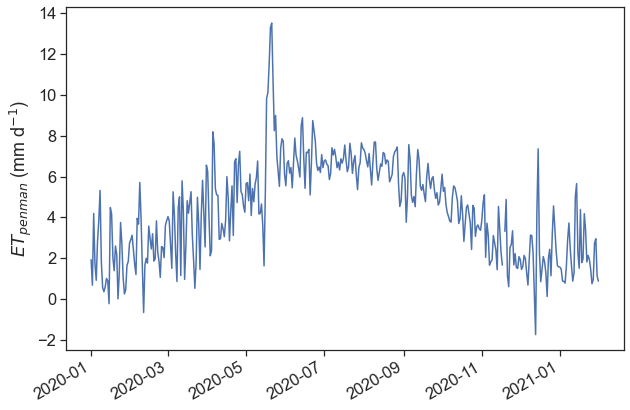

In [16]:
#collapse-hide

def E_penman(df):
    T = df['T']
    Delta = df['Delta']
    gamma = df['gamma']
    Rn = df['Rn']
    G = df['G']
    EA = 6.43*df['f_wind'] * df['VPD']
    lambd = df['lambda']
    return ((Delta / (Delta + gamma))*(Rn - G) + ((gamma / (Delta + gamma))*EA)) / lambd

# daily_data
df_pen['E_penman'] = E_penman(df_pen)

fig, ax = plt.subplots(1, figsize=(10,7))
ax.plot(df_pen['E_penman'])
plt.gcf().autofmt_xdate()
ax.set_ylabel(r"$ET_{penman}$ (mm d$^{-1}$)")

Make a plot with the following:  
1. the Penman (daily) estimate of the potential evapotranspiration.
2. the Thornthwaite (monthly) estimate of the potential ET.
3. daily evaporation pan data.

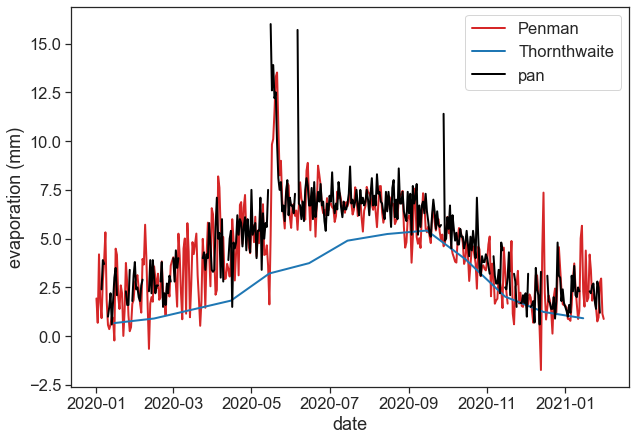

In [18]:
#collapse-hide

fig, ax = plt.subplots(1, 1, figsize=(10,7))
ax.plot(df_pen['E_penman'], color="tab:red", label="Penman", linewidth=2)
ax.plot(df_th['Ep']/30, color="tab:blue", label="Thornthwaite", linewidth=2)
ax.plot(1*df2['pan evaporation (mm)'], color="black", label="pan", linewidth=2)

ax.set(xlabel="date",
       ylabel="evaporation (mm)")
ax.legend();

Plot the mean temperatures used in the Penman calculation (daily mean) and in the Thornthwaite calculation (monthly mean).

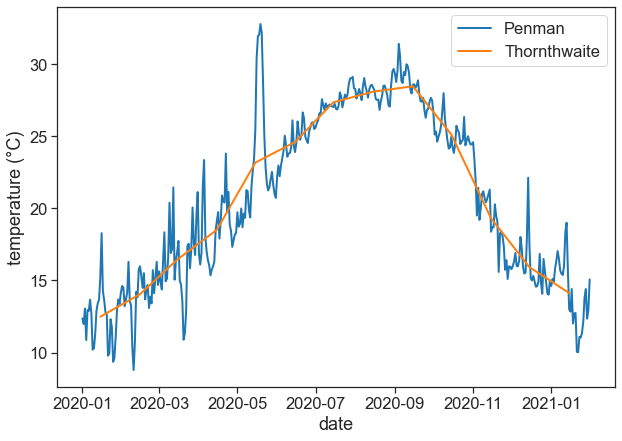

In [20]:
#collapse-hide

fig, ax = plt.subplots(1, 1, figsize=(10,7))
ax.plot(df_pen['T'], color="tab:blue", label="Penman", linewidth=2)
ax.plot(df_th['T'], color="tab:orange", label="Thornthwaite", linewidth=2)
ax.set(xlabel="date",
       ylabel="temperature (°C)")
ax.legend();